In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from pandas import DataFrame,Series
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

In [5]:
#读取数据
digits = load_digits(n_class=7)
X = digits.data
y = digits.target
X.shape

(1264, 64)

In [7]:
#降维（3维）分析
tsne = manifold.TSNE(n_components=3,init='pca',random_state=0)
start_time=time.time()
X_tsne = tsne.fit_transform(X)
print 'Time: %.3fs' % (time.time()-start_time)

Time: 26.778s


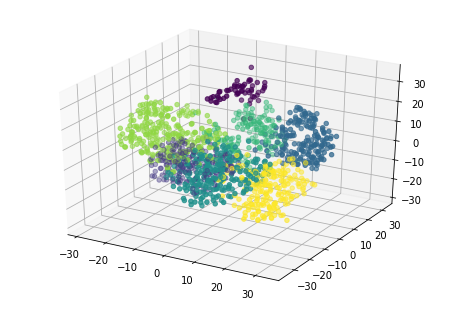

In [46]:
#KMeans聚类分析并绘制颜色
y_predict = KMeans(n_clusters=7, random_state=9).fit_predict(X_tsne)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:,2],c=y_predict)
plt.show()

In [47]:
#评估预测分数
metrics.calinski_harabaz_score(X_tsne, y_predict)

752.47587370666429

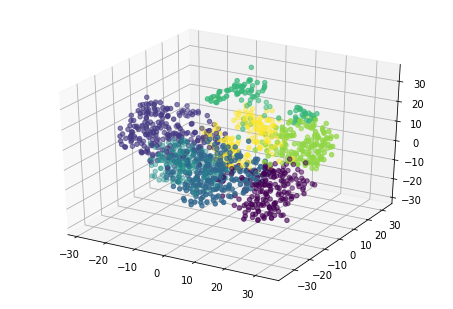

In [48]:
#MiniBatchKMeans聚类分析并绘制颜色
y_predict_mini= MiniBatchKMeans(n_clusters=7, batch_size = 200, random_state=9).fit_predict(X_tsne)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:,2],c=y_predict_mini)
plt.show()

In [49]:
#评估预测分数
metrics.calinski_harabaz_score(X_tsne, y_predict_mini)

722.2678909467902

In [50]:
print y
print y_predict
print y_predict_mini

[0 1 2 ..., 4 4 0]
[3 4 4 ..., 2 2 3]
[2 6 6 ..., 5 5 2]


In [87]:
#将聚类结果映射
def predictMap(y):
    res = np.zeros(1264)
    for i,value in enumerate(y):
        if value == 3:
            res[i] = 0
        elif value == 2:
            res[i] = 4
        elif value == 5:
            res[i] = 3
        elif value == 6:
            res[i] = 6
        elif value == 0:
            res[i] = 1
        elif value == 1:
            res[i] = 2
        else:
            res[i] = 5
    return res
def predictMapMini(y):
    res = np.zeros(1264)
    for i,value in enumerate(y):
        if value == 2:
            res[i] = 0
        elif value == 5:
            res[i] = 4
        elif value == 1:
            res[i] = 3
        elif value == 0:
            res[i] = 6
        elif value == 4:
            res[i] = 1
        elif value == 3:
            res[i] = 2
        else:
            res[i] = 5
    return res
y_predict_1 = predictMap(y_predict)
y_predict_1 = y_predict_1.astype(np.int32)#类型转化，查到y的类型np.int32
y_predict_2 = predictMapMini(y_predict_mini)
y_predict_2 = y_predict_2.astype(np.int32)
print y
print y_predict_1
print y_predict_2

[0 1 2 ..., 4 4 0]
[0 5 5 ..., 4 4 0]
[0 5 5 ..., 4 4 0]


In [94]:
#评估正确率
def getscore(y0,y1):
    cnt = 0
    for i,value0 in enumerate(y0):
        if value0 == y1[i]:
            cnt = cnt + 1
        cnt = float(cnt)
    return cnt/(y0.shape[0])
score_1 = getscore(y,y_predict_1)
score_2 = getscore(y,y_predict_2)
print 'KMeans-score is %.3f'%(score_1)
print 'MiniBatchKMeans-score is %.3f'%(score_2)

KMeans-score is 0.730
MiniBatchKMeans-score is 0.728
